# Applying word2vec to see how similar two documents are

# 1)- Importing key modules

In [1]:
# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [34]:
import plotly

from plotly.offline import init_notebook_mode, plot, iplot
import plotly
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.graph_objs import *

In [3]:
import nltk
import pandas as pd
import pickle
import gensim
from gensim.models import word2vec

C:\Users\Hassan\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# 2)-Loading Dataset

Already cleaned and preprocessed

In [4]:
train = pd.read_pickle('basic_text_pre-process.pkl')
train.head()

id  label                                              tweet  word_count  \
0   1      0  father dysfunctional selfish drag kid dysfunct...          21   
1   2      0  thanks lyft credit cant use cause dont offer w...          22   
2   3      0                                     bihday majesty           5   
3   4      0                            model take urð ðððð ððð          17   
4   5      0                      factsguide society motivation           8   

   char_count  avg_word  stopwords  hastags  numerics  upper  
0         102  4.555556         10        1         0      0  
1         122  5.315789          5        3         0      0  
2          21  5.666667          1        0         0      0  
3          86  4.928571          5        1         0      0  
4          39  8.000000          1        1         0      0

In [5]:
type(train['tweet'])

pandas.core.series.Series

In [6]:
data_file=train['tweet']

In [7]:
data_file=data_file.str.split()

In [8]:
corpus = list (data_file)

In [9]:
len(corpus)

31962

In [12]:
model = gensim.models.Word2Vec (corpus, size=150, window=10, min_count=2, workers=10)

In [14]:
model.train(corpus,total_examples=len(corpus),epochs=10)

(2081989, 2392310)

In [15]:
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

[('baking', 0.8978840708732605),
 ('germany', 0.8840792179107666),
 ('worldginday', 0.8692261576652527),
 ('enroute', 0.8659577965736389),
 ('chi', 0.8636314868927002),
 ('polska', 0.8628891110420227)]

In [16]:
w1 = ["bed"]
model.wv.most_similar (positive=w1,topn=6)

[('dream', 0.8920897841453552),
 ('bestseller', 0.8811387419700623),
 ('youðð', 0.857475221157074),
 ('wakeup', 0.844795823097229),
 ('without', 0.8394032716751099),
 ('steampunk', 0.8272087574005127)]

# Similarity between two words in the vocabulary

In [17]:
model.wv.similarity(w1="bed",w2="sheet")

0.54793537

In [18]:
model.wv.similarity(w1="bad",w2="ugly")

0.6023947

In [21]:
model.wv.similarity(w1="bad",w2="bad")

1.0

In [20]:
model.wv.similarity(w1="ugly",w2="good")

0.282411

# odd one out

In [22]:
model.wv.doesnt_match(["river","sea","france"])

'france'

In [23]:
model.wv.doesnt_match(["cat","dog","flower"])

'flower'

# PCA

In order to reduce dimensions

In [24]:
from sklearn.decomposition import PCA

vocab = list(model.wv.vocab)
X = model[model.wv.vocab]

In [25]:
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

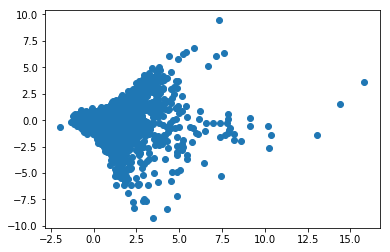

In [26]:
import matplotlib.pyplot as pyplot

pyplot.scatter(result[:, 0], result[:, 1])

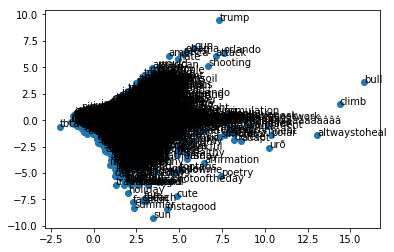

In [33]:
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i,0], result[i, 1]))
pyplot.show()

In [35]:
wrds = list(model.wv.vocab)
len(wrds)

14138

In [36]:
#zip the two lists containing vectors and words
zipped = zip(model.wv.index2word, model.wv.vectors)

#the resulting list contains `(word, wordvector)` tuples. We can extract the entry for any `word` or `vector`
wordresult = [i for i in zipped if i[0] == word]
vecresult = [i for i in zipped if i[1] == vector]

In [37]:
model.wv.most_similar('bed')

[('dream', 0.8920897841453552),
 ('bestseller', 0.8811387419700623),
 ('youðð', 0.857475221157074),
 ('wakeup', 0.844795823097229),
 ('without', 0.8394032716751099),
 ('steampunk', 0.8272087574005127),
 ('lionel', 0.8204110264778137),
 ('dreambig', 0.818009078502655),
 ('richie', 0.8071569800376892),
 ('go', 0.8011996150016785)]

In [38]:
model.wv.most_similar('pet')

[('chihuahua', 0.8984995484352112),
 ('dog', 0.883976936340332),
 ('weho', 0.8734041452407837),
 ('dogsoftwitter', 0.8652467727661133),
 ('puppy', 0.8623772859573364),
 ('cuddling', 0.8580833077430725),
 ('girlâ', 0.8572385907173157),
 ('malinois', 0.855131208896637),
 ('instaboy', 0.8508346676826477),
 ('versatile', 0.8499030470848083)]

In [40]:
#dataframe of similar words
word_frame = pd.DataFrame(result, index=vocab, columns=['x', 'y'])
word_frame.reset_index(inplace=True)
word_frame.columns = ['words', 'x', 'y']
word_frame.sort_values(by=['x','y']).head()

words         x         y
4365        tbtâ -1.960313 -0.613061
2407    iminlove -1.348734 -0.185826
8180   lulybtips -1.235087 -0.158219
9014      shutup -1.206026  0.392708
13129    theresa -1.175042  0.250284

In [41]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, 
                      n_components=2, 
                      init='pca', 
                      n_iter=1000, 
                      random_state=23, 
                      learning_rate=200)
    
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(50, 50)) 
    
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

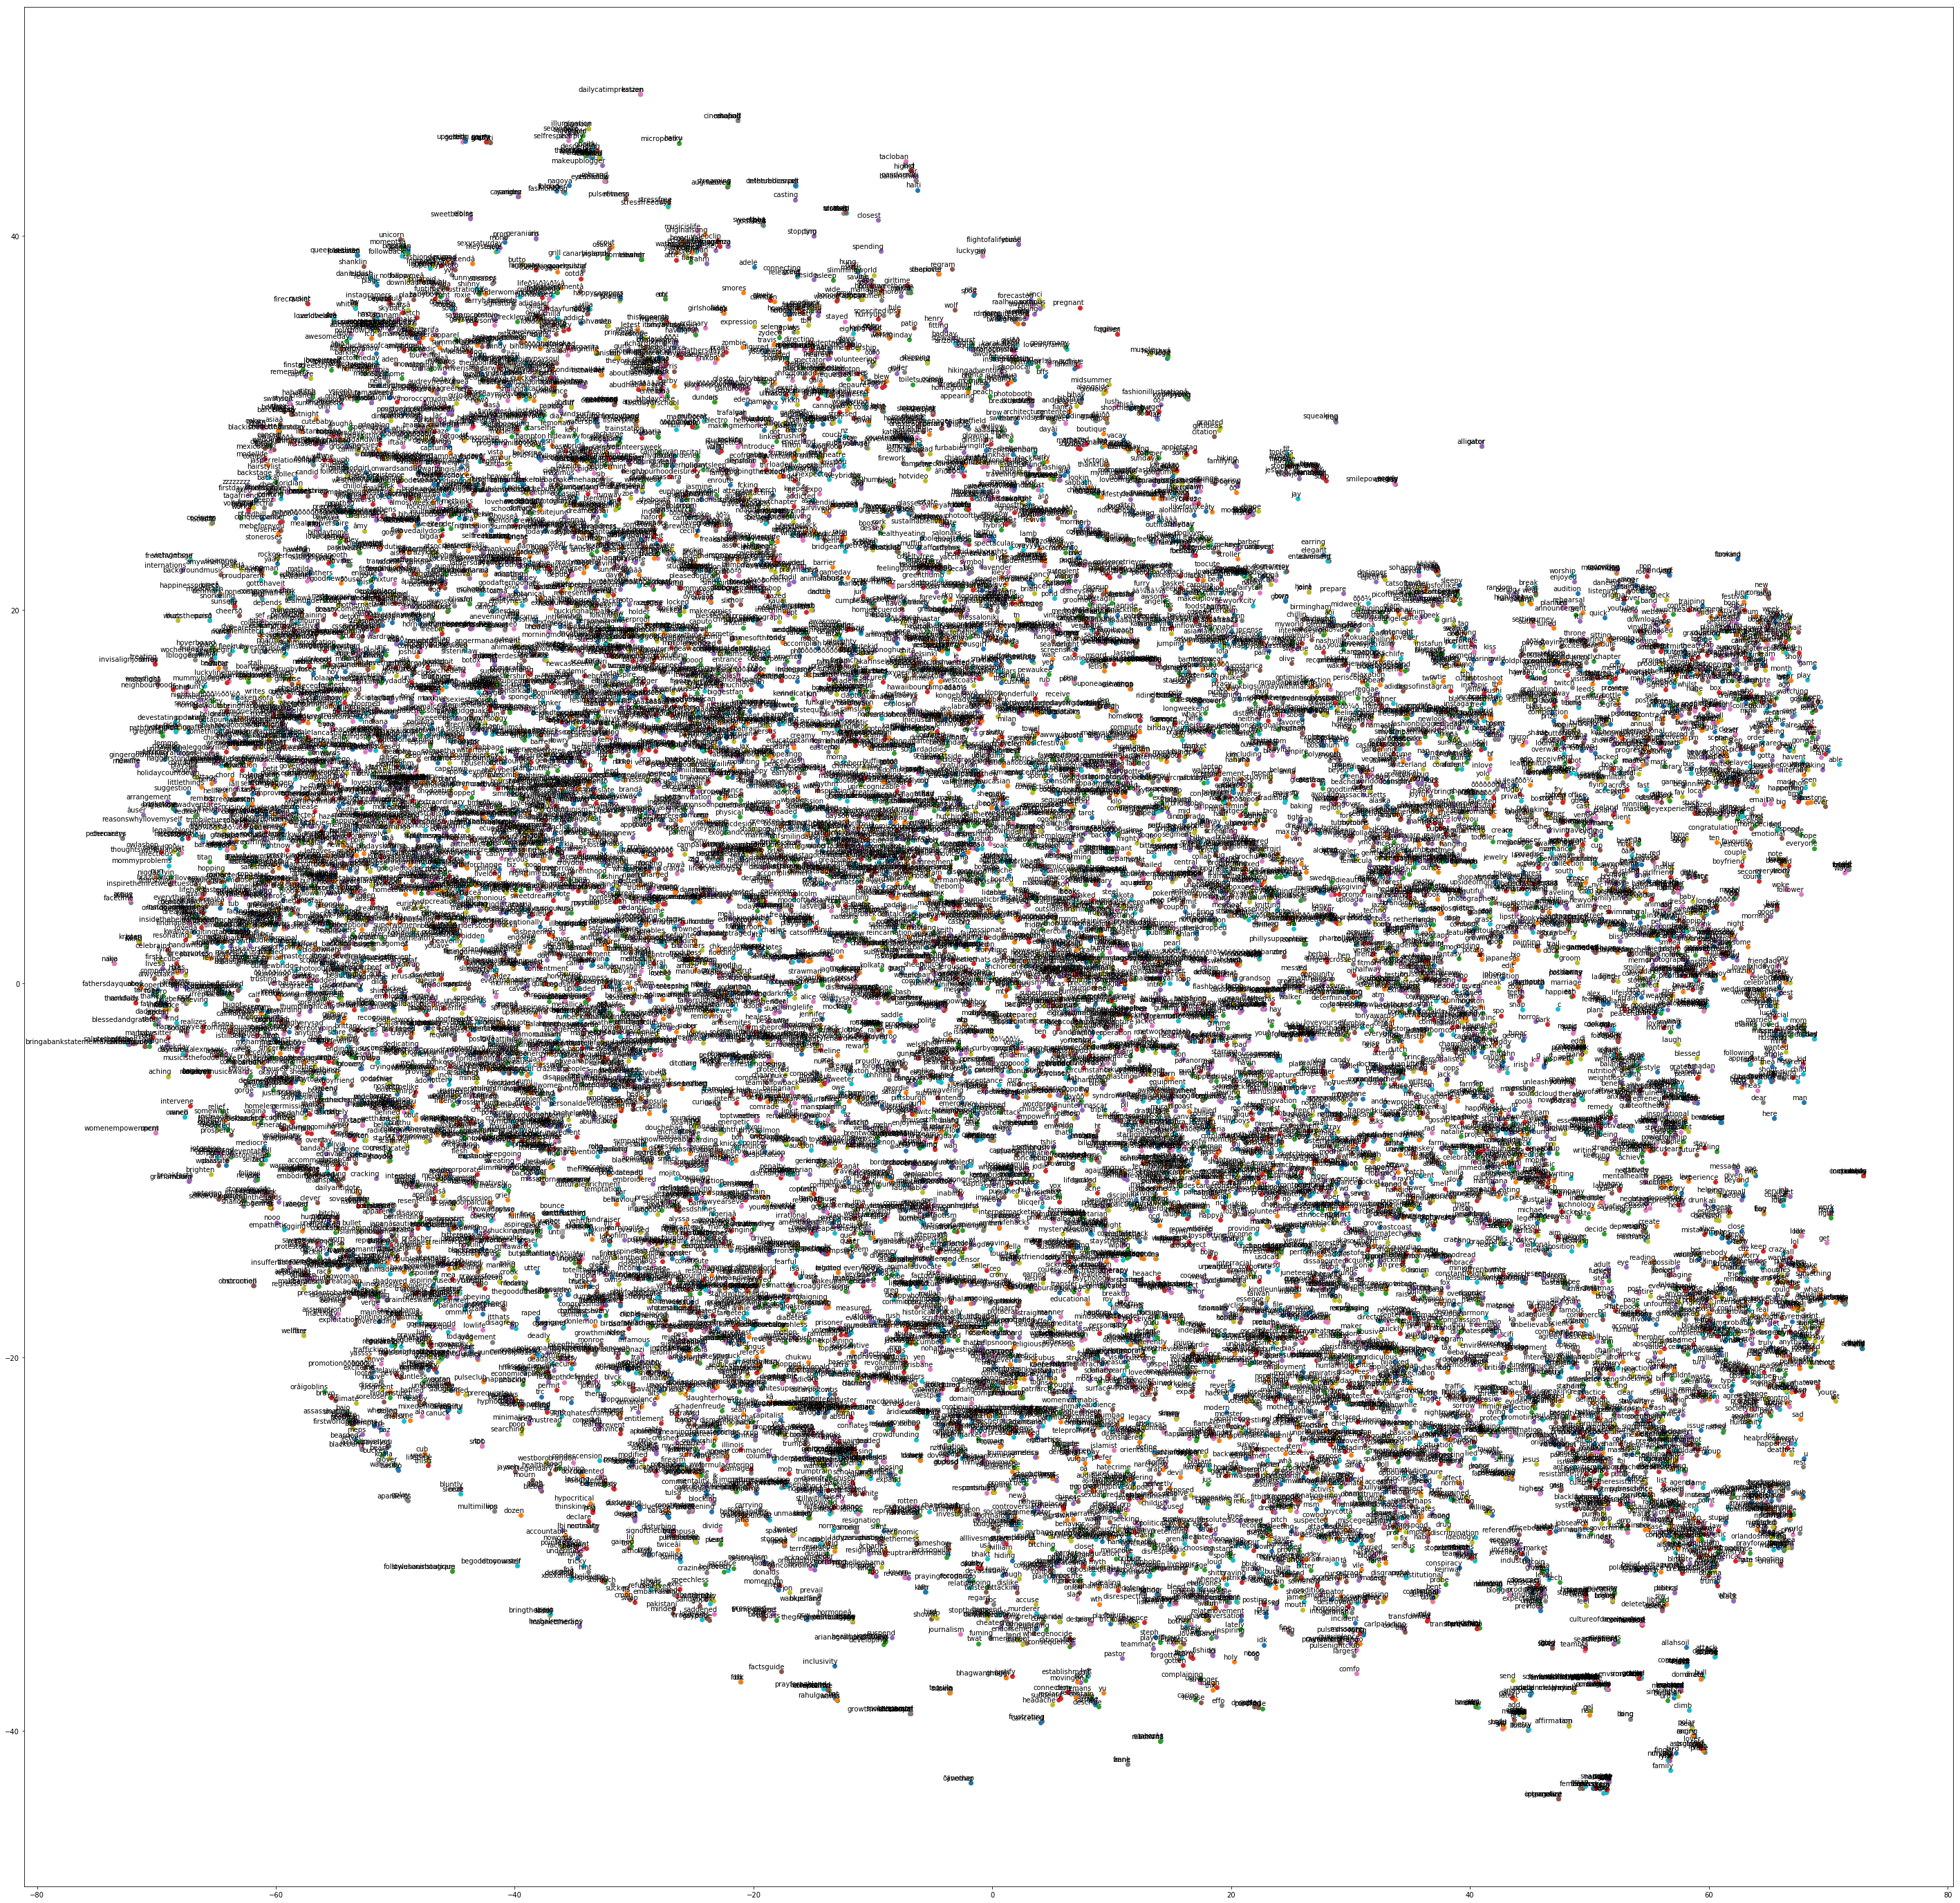

In [42]:
tsne_plot(model)

In [43]:
vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])

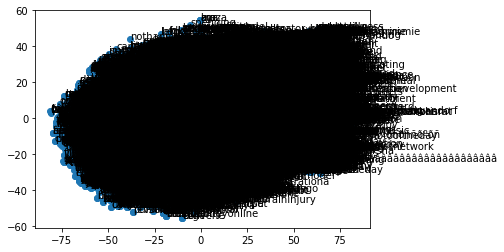

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)
    
plt.show()